https://www.kaggle.com/leowanty/tuto-3-mod-lisation-avec-scikit-learn

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [6]:
data = pd.read_csv("./sidney/data.csv")

In [7]:
data.shape

(4600, 18)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

On voit la variable "date" n'a pas un type de "date" --> A CHANGER

In [45]:
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S")

In [51]:
data['date'][0].month

5

In [11]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [15]:
data['price'][data["price"] == 0].count()

49

In [ ]:
Il y a 49 maisons vendues pour 0
On les supprime

In [18]:
data = data[data['price']>0]

In [19]:
# Pour les colonnes qualitatives: 
print("Nombre de valeurs pour les 10 villes contenant le plus de valeurs :")
data.city.value_counts().head(10)

Nombre de valeurs pour les 10 villes contenant le plus de valeurs :


Seattle        1561
Renton          291
Bellevue        281
Redmond         235
Kirkland        187
Issaquah        186
Kent            184
Auburn          175
Sammamish       171
Federal Way     145
Name: city, dtype: int64

In [52]:
data['price']

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4551, dtype: float64

In [ ]:
SUPPRESSION OUTLIERS

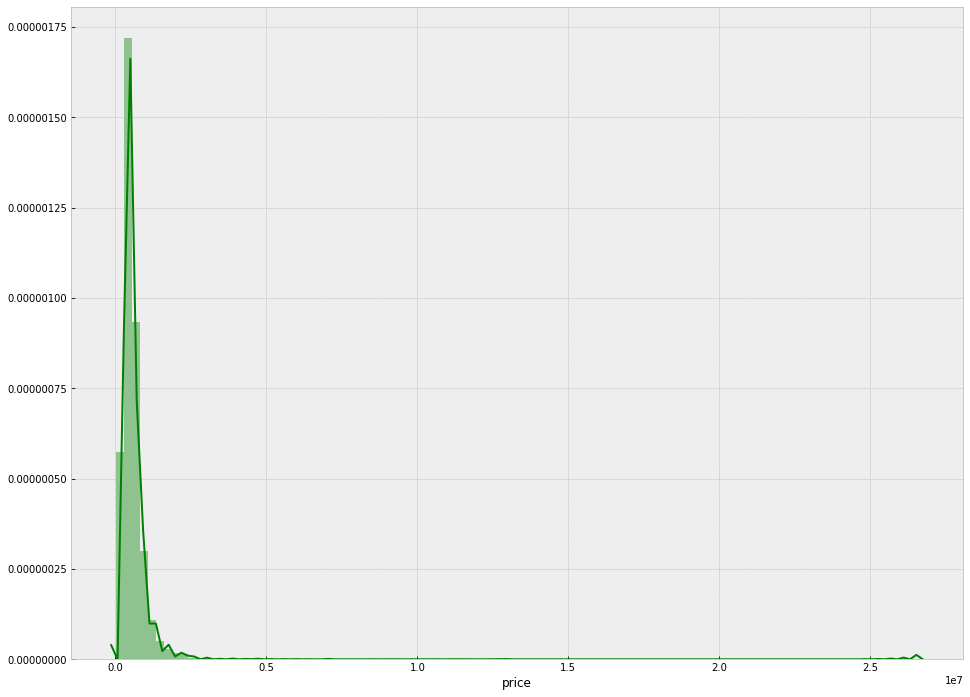

In [59]:
plt.figure(figsize=(16,12))
sns.distplot(data['price'], color='g', bins=100, hist_kws={'alpha': 0.4})

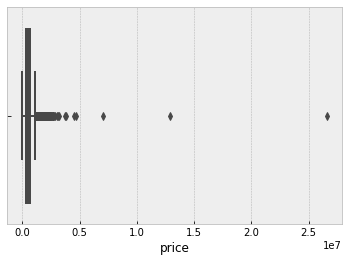

In [60]:
sns.boxplot(x=data['price'])

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.


In [62]:
from scipy import stats
z = np.abs(stats.zscore(data['price']))
print(z)

[0.43433204 3.23851396 0.38290155 ... 0.25006164 0.6287038  0.5982002 ]


In [67]:
len(z)

4551

In [68]:
data_o = data[(z<3)]

In [70]:
len(data_o)

4517

On passe au log et ça passe 




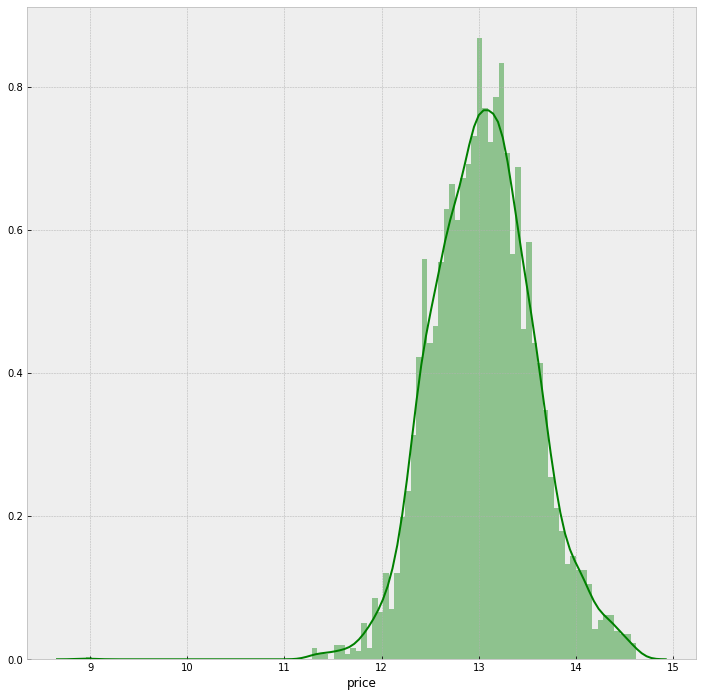

In [72]:
plt.figure(figsize=(12,12))
sns.distplot(np.log(data_o['price']), bins=100, color='g', hist_kws={'alpha':0.4})

In [76]:
df = data_o

Y = df['price']
df = df.loc[:, df.columns.difference(['price'])]

In [78]:
Y_cut = pd.cut(Y, Y.quantile([0, 0.33, 0.66, 1]), include_lowest=True)

In [82]:
len(set(Y_cut))
print(Y.quantile([.33,.66]))


0.33    370000.0
0.66    568780.0
Name: price, dtype: float64


SEPARATION 

In [85]:
ix_train = df.sample(frac=0.7, replace=False, random_state=0).index.values
ix_test = df.index.difference(ix_train).values


print("Size train {}".format(len(ix_train)))
print("Size test {}".format(len(ix_test)))

Size train 3162
Size test 1355


In [86]:
ix_train

array([4535, 1589, 1761, ..., 2129, 3705, 1831])

In [92]:
df = df[df.columns.difference(['country', 'street'])]

In [100]:
len(list(set(df['statezip'])))

77

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
dummy_statezip = pd.get_dummies(df['statezip'], prefix="statezip")

In [106]:
df = pd.concat([df, dummy_statezip], axis=1)

In [110]:
del df['statezip']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 4599
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bathrooms          4517 non-null   float64       
 1   bedrooms           4517 non-null   float64       
 2   city               4517 non-null   object        
 3   condition          4517 non-null   int64         
 4   date               4517 non-null   datetime64[ns]
 5   floors             4517 non-null   float64       
 6   sqft_above         4517 non-null   int64         
 7   sqft_basement      4517 non-null   int64         
 8   sqft_living        4517 non-null   int64         
 9   sqft_lot           4517 non-null   int64         
 10  view               4517 non-null   int64         
 11  waterfront         4517 non-null   int64         
 12  yr_built           4517 non-null   int64         
 13  yr_renovated       4517 non-null   int64         
 14  statezip

In [116]:
dummy_city = pd.get_dummies(df['city'], prefix='city')

In [121]:
df = pd.concat([df, dummy_city], axis=1)

In [122]:
del df['city']

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 4599
Columns: 134 entries, bathrooms to city_Yarrow Point
dtypes: datetime64[ns](1), float64(3), int64(9), uint8(121)
memory usage: 1.2 MB


In [126]:
from sklearn import preprocessing

# Initialisation du standard scaler :
std_scaler = preprocessing.StandardScaler()
# Récupérer la liste des colonnes numériques :
num_cols = df.select_dtypes(exclude=["object"]).columns

In [127]:
num_cols

Index(['bathrooms', 'bedrooms', 'condition', 'date', 'floors', 'sqft_above',
       'sqft_basement', 'sqft_living', 'sqft_lot', 'view',
       ...
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point'],
      dtype='object', length=134)

In [144]:
df['date'] = pd.to_numeric(df['date'])


from sklearn import preprocessing

# Initialisation du standard scaler :
std_scaler = preprocessing.StandardScaler()
# Récupérer la liste des colonnes numériques :
num_cols = df.select_dtypes(exclude=["object"]).columns

# Pour ne pas "tricher" en appliquant la standardisation à partir des données du test set,
# on paramètre le scaler avec les données du jeu d'entrainement exclusivement :
std_scaler.fit(df.loc[:,num_cols].loc[ix_train])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [145]:
# On applique ensuite sur tout le jeu de données :
df.loc[:,num_cols] = std_scaler.transform(df.loc[:,num_cols])

Dans get dummies, mettre "drop_first" = TRUE pour drop la référence

CLUSTERING NON SUPERVISE

In [148]:
'city' in df.columns

False

On affiche les boxplot de prix par clusters :


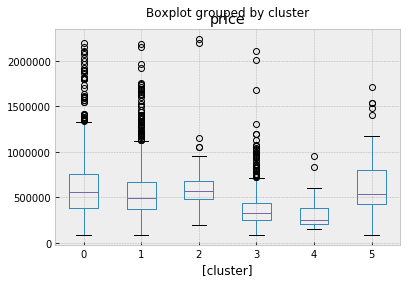

In [150]:
from sklearn.cluster import KMeans
# Initialisation des paramètres de l'algorithme :
Kmeans_model = KMeans(n_clusters=6, init = 'k-means++', random_state=123)

# On applique le clustering sur le jeu d'entraînement (train) :
# On enregistre dans la variable clusters le numéro du cluster auquel chaque maison est identifiée
clusters = Kmeans_model.fit_predict(df.loc[ix_train])

# On enregistre les clusters et les colonnes à comparer dans un dataframe pandas :
train_clusters = pd.DataFrame([*zip(clusters,Y.loc[ix_train],Y_cut.loc[ix_train])], 
                              columns=['cluster','price','price_cut'])

train_clusters.boxplot(by='cluster')
print('On affiche les boxplot de prix par clusters :')

In [151]:
print("On affiche la table des profils ligne par tranche de prix, pour chaque cluster :")
cross_table = pd.crosstab(train_clusters.cluster, train_clusters.price_cut, normalize='index')
cross_table.style.background_gradient(cmap='Reds', axis=1, low=0, high=1)

On affiche la table des profils ligne par tranche de prix, pour chaque cluster :


price_cut,"(7799.999, 370000.0]","(370000.0, 568780.0]","(568780.0, 2238888.0]"
cluster,,,
0,0.236971,0.285152,0.477876
1,0.252101,0.372549,0.375350
2,0.079365,0.420635,0.500000
3,0.623377,0.268831,0.107792
4,0.693878,0.244898,0.061224
5,0.100775,0.465116,0.434109


On en conclue que le clustering parvient à former des groupes de maisons avec des niveaux de prix plus ou moins homogènes :

Les clusters 0 et 2 sont principalement composés de maisons peu chères.
Les clusters 1, 3 et 4 contiennent des maisons au prix élevé.
Le cluster 5 est a peu près équitablement réparti entre les trois classes de prix.